# Communities and Crime Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('files/dataframe.pkl')

## Eksploracja danych

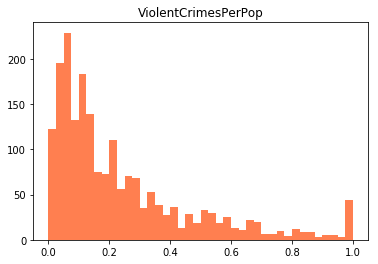

In [2]:
df.hist(column = ['ViolentCrimesPerPop'], bins = 40, color = 'coral', grid=False)
plt.show()

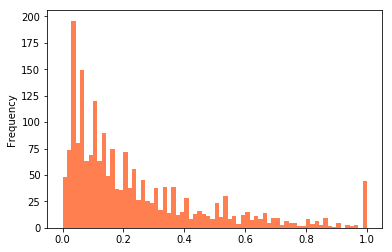

In [3]:
df.ViolentCrimesPerPop.plot(kind = 'hist', bins=70, color='coral')

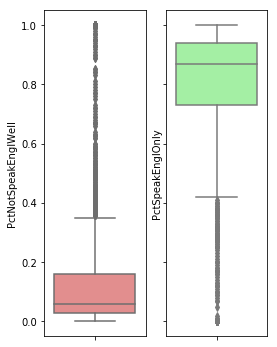

In [4]:
f, axes = plt.subplots(1, 2, figsize=(4, 6), sharex=True, sharey=True)
sns.boxplot(data=df, y='PctNotSpeakEnglWell', color='lightcoral', ax=axes[0])
sns.boxplot(data=df, y='PctSpeakEnglOnly', color='palegreen', ax=axes[1])

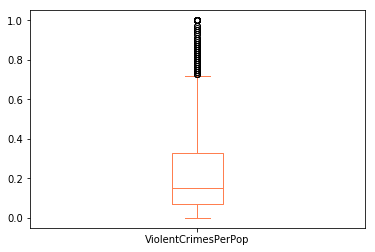

In [5]:
df.ViolentCrimesPerPop.plot.box(color="coral")

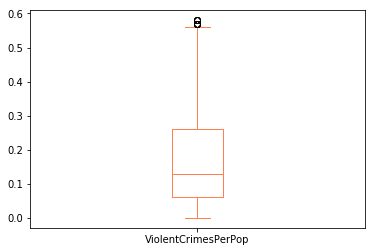

In [6]:
r_ViolentCrimesPerPop_cleared = df[df.ViolentCrimesPerPop < df.ViolentCrimesPerPop.quantile(0.9)]
r_ViolentCrimesPerPop_cleared.ViolentCrimesPerPop.plot.box(color="coral") 

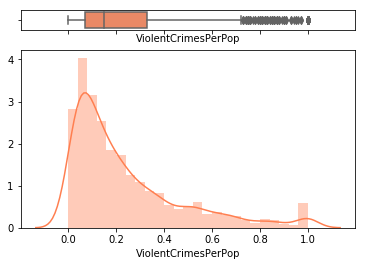

In [7]:
# gęstość liczby przestępstw kryminalnych na 100 tys. osób
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.1, .9)})
sns.boxplot(df['ViolentCrimesPerPop'], ax=ax_box, color="coral")
sns.distplot(df['ViolentCrimesPerPop'], ax=ax_hist, color="coral")


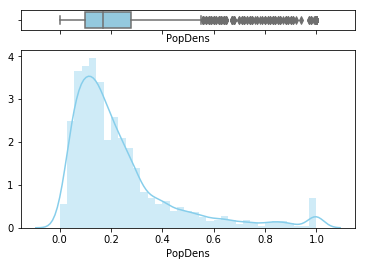

In [8]:
# gęstość zaludnienia na milę kwadratową
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.1, .9)})
sns.boxplot(df['PopDens'], ax=ax_box, color="skyblue")
sns.distplot(df['PopDens'], ax=ax_hist, color="skyblue")

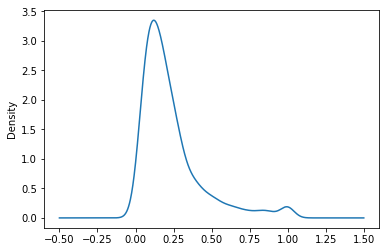

In [9]:
df.PopDens.plot.density() # gęstość zaludnienia na milę kwadratową

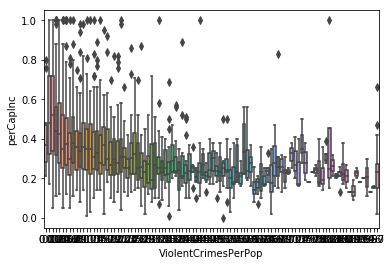

In [10]:
sns.boxplot( x=df['ViolentCrimesPerPop'], y=df['perCapInc'])

## Wizualizacja danych

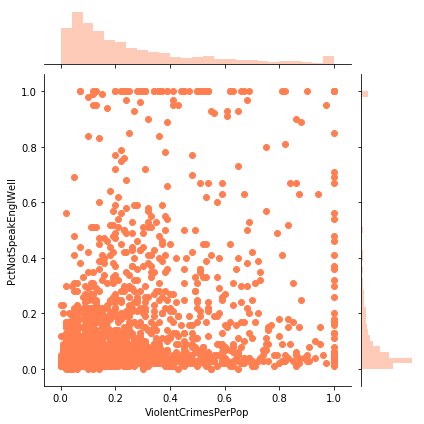

In [11]:
sns.jointplot(x = df["ViolentCrimesPerPop"], y = df["PctNotSpeakEnglWell"], color="coral")

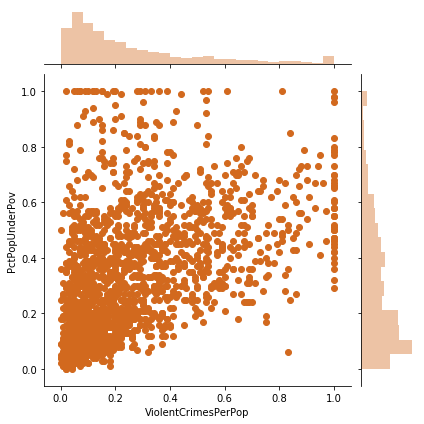

In [12]:
sns.jointplot(x = df["ViolentCrimesPerPop"], y = df["PctPopUnderPov"], color="chocolate")

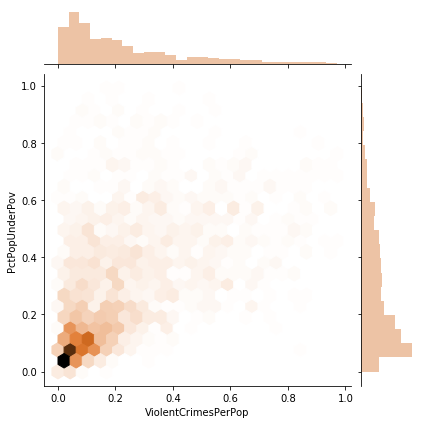

In [13]:
df_ViolentCrimesPerPop_cleared = df[df.ViolentCrimesPerPop < df.ViolentCrimesPerPop.quantile(0.99)]
df_PctPopUnderPov_cleared = df_ViolentCrimesPerPop_cleared[df_ViolentCrimesPerPop_cleared.PctPopUnderPov < df.PctPopUnderPov.quantile(0.99)]
sns.jointplot("ViolentCrimesPerPop", "PctPopUnderPov", kind = "hex", data = df_PctPopUnderPov_cleared, color="chocolate") # tak jest czytelniej

## Korelacja

In [14]:
corr = df.corr() # sprawdźmy korelację liniową cech

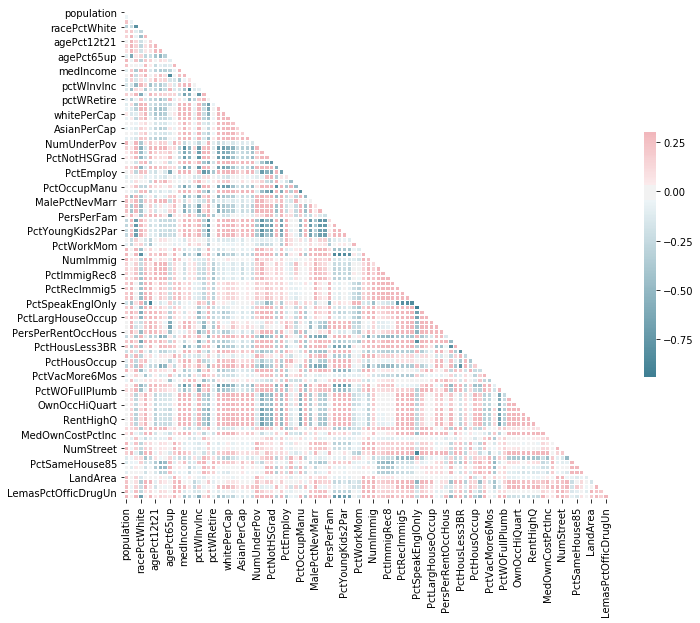

In [15]:
# do oglądania korelacji najlepiej użyć wizualizacji w postaci heatmapy

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
corr.unstack().sort_values().drop_duplicates()

PctSpeakEnglOnly  PctNotSpeakEnglWell   -0.939369
pctWWage          pctWSocSec            -0.897936
racePctHisp       PctSpeakEnglOnly      -0.890768
PctForeignBorn    PctSpeakEnglOnly      -0.877793
PctIlleg          PctKids2Par           -0.870198
PctFam2Par        PctIlleg              -0.843234
agePct65up        pctWWage              -0.838662
PctRecImmig10     PctSpeakEnglOnly      -0.832454
PctOccupMgmtProf  PctOccupManu          -0.825569
PctSpeakEnglOnly  PctRecImmig8          -0.814808
                  PctPersDenseHous      -0.813401
PctYoungKids2Par  PctIlleg              -0.812283
racePctWhite      PctIlleg              -0.803452
PctSpeakEnglOnly  PctRecImmig5          -0.800047
PctIlleg          PctTeen2Par           -0.798461
racePctWhite      racepctblack          -0.794389
medIncome         PctPopUnderPov        -0.791095
PctHousLess3BR    PctPersOwnOccup       -0.789660
PctBSorMore       PctOccupManu          -0.783251
PctHousLess3BR    PctHousOwnOcc         -0.782408


Przykładowo widzimy silną korelację pomiędzy dochodem na mieszkańca rasy kaukaskiej (**whitePerCap**) a dochodem na mieszkańca (**perCapInc**).

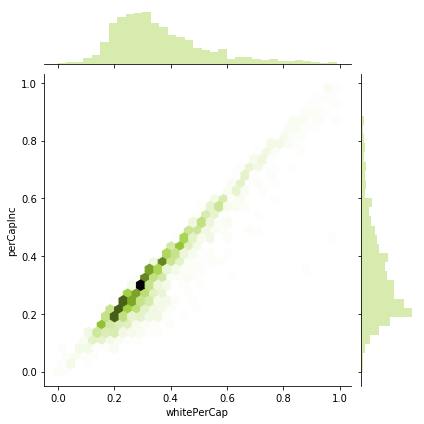

In [17]:
df_whitePerCap_cleared = df[df.whitePerCap < df.whitePerCap.quantile(0.99)]
df_perCapInc_cleared = df_whitePerCap_cleared[df_whitePerCap_cleared.perCapInc < df.perCapInc.quantile(0.99)]
sns.jointplot("whitePerCap", "perCapInc", kind = "hex", data = df_perCapInc_cleared, color="yellowgreen")

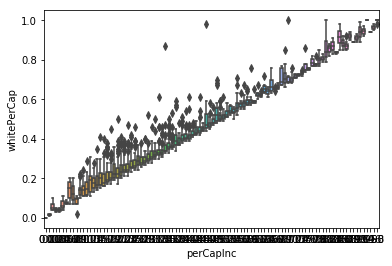

In [18]:
sns.boxplot( x=df['perCapInc'], y=df['whitePerCap'])

In [19]:
corr.unstack().tail(101).sort_values() # sprawdzamy korelację dla ViolentCrimesPerPop

ViolentCrimesPerPop  PctKids2Par           -0.738424
                     PctFam2Par            -0.706667
                     racePctWhite          -0.684770
                     PctYoungKids2Par      -0.666059
                     PctTeen2Par           -0.661582
                     pctWInvInc            -0.576324
                     PctPersOwnOccup       -0.525491
                     PctHousOwnOcc         -0.470683
                     medFamInc             -0.439108
                     medIncome             -0.424221
                     MedNumBR              -0.357385
                     perCapInc             -0.352085
                     PctOccupMgmtProf      -0.339109
                     PctEmploy             -0.331643
                     PctHousOccup          -0.319010
                     PctBSorMore           -0.314675
                     pctWWage              -0.305500
                     blackPerCap           -0.275391
                     RentLowQ              -0.

Tu zaś widzimy powiązanie pomiędzy liczbą przestępstw (**ViolentCrimesPerPop**) a odsetkiem dzieci wychowywanych przez obydwoje rodziców (**PctKids2Par**), odsetkiem dzieci nieślubnych (**PctIlleg**) czy odsetkiem osób rasy czarnej (**racepctblack**).

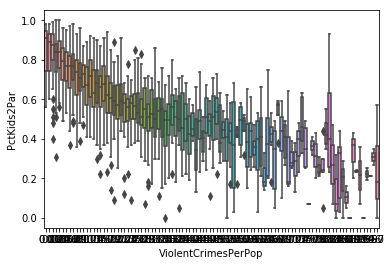

In [20]:
sns.boxplot( x=df['ViolentCrimesPerPop'], y=df['PctKids2Par'])

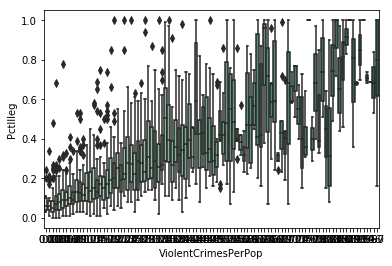

In [21]:
sns.boxplot( x=df['ViolentCrimesPerPop'], y=df['PctIlleg'], palette="ch:2.5,-.2,dark=.3")

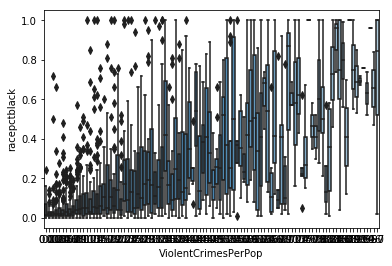

In [22]:
sns.boxplot( x=df['ViolentCrimesPerPop'], y=df['racepctblack'], palette="Blues_d")

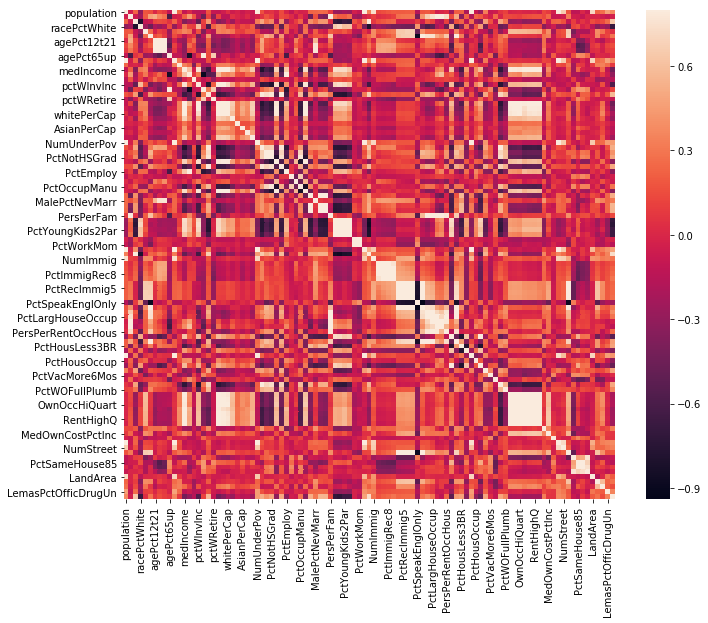

In [23]:
fig = plt.figure(figsize = (11, 9))
sns.heatmap(corr, vmax = 0.8)
plt.show()

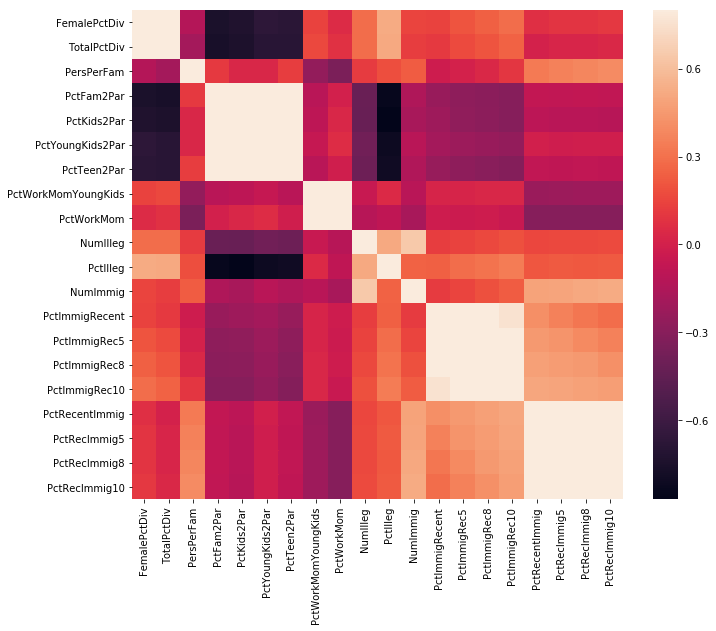

In [24]:
fig = plt.figure(figsize = (11, 9))
part = df.iloc[:,40:60].corr()
sns.heatmap(part, vmax = 0.8)
plt.show()

Co ciekawe, jest silna korelacja pomiędzy odsetkiem dzieci (**PctKids2Par**, **PctYoungKids2Par**) czy nastolatków (**PctTeen2Par**) wychowywanych przez obydwoje rodziców a odsetkiem rozwiedzonych kobiet (**FemalePctDiv**) czy osób (**TotalPctDiv**) czy osób, które nigdy nie były zamężne (**PctIlleg**).

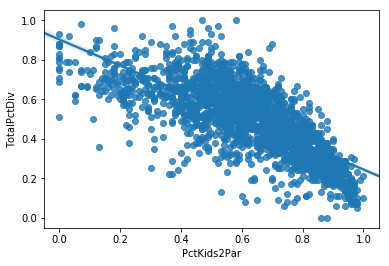

In [25]:
sns.regplot(df.PctKids2Par, df.TotalPctDiv)

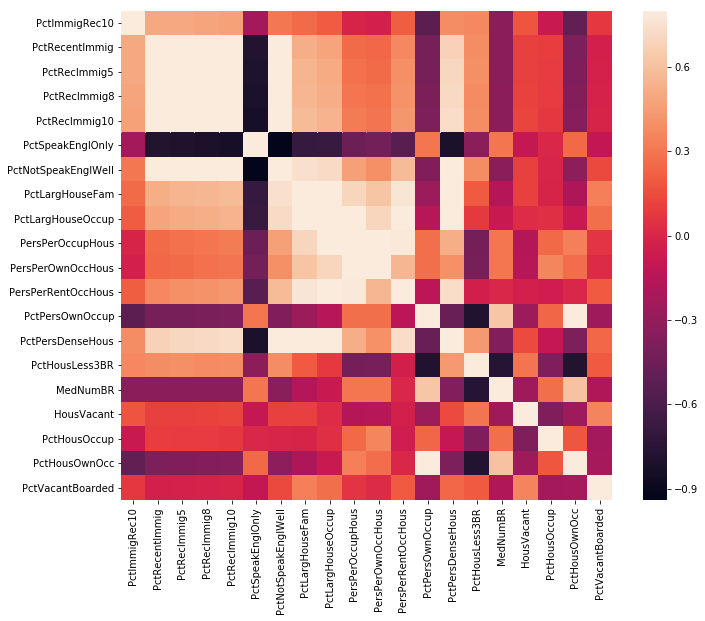

In [26]:
fig = plt.figure(figsize = (11, 9))
corr = df.iloc[:,55:75].corr()
sns.heatmap(corr, vmax = 0.8)
plt.show()

Niektóre informacje są raczej oczywiste, np. korelacja pomiędzy odsetkiem osób mówiących tylko po angielsku (**PctSpeakEnglOnly**) a odsetkiem populacji imigrantów (**PctRecImmig5**, **PctRecImmig8**, **PctRecImmig10**).

Istnieje też korelacja pomiędzy odsetkiem osób mówiących tylko po angielsku (**PctSpeakEnglOnly**) a odsetkiem populacji imigrantów (**PctRecImmig5**, **PctRecImmig8**, **PctRecImmig10**).

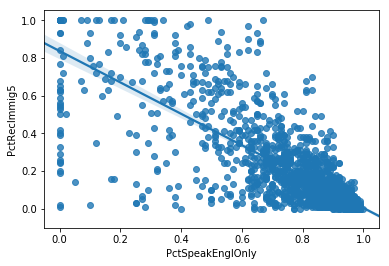

In [27]:
sns.regplot(df.PctSpeakEnglOnly, df.PctRecImmig5)

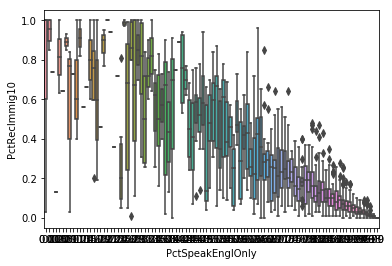

In [29]:
sns.boxplot(x="PctSpeakEnglOnly", y = "PctRecImmig10", data = df) # im mniej osób mówiących po angielsku, tym więcej imigrantów

In [28]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)